# Projet numérique : Baptiste Guilluy et Loris Megy

Nous étudions le "modèle proie-prédateur" suivant :
\begin{cases}
\dot{x_1} = x_1(\alpha - \beta x_2) \\
\dot{x_2} = -x_2(\gamma - \delta x_1) \\
\end{cases}

où $x_1 \geq 0$ est le nombre de proies, $x_2 \geq 0$ le nombre de prédateurs.\
$\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

En notant $x = (x_1,x_2)$, on réécrit le problème sous la forme $\dot{x} = f(x)$ (équation $E$), avec :
$$\begin{array}{ccccc}
f & : & \mathbb{R}^{2} & \to & \mathbb{R}^{2} \\
 & & x_1,x_2 & \mapsto & x_1(\alpha - \beta x_2),-x_2(\gamma - \delta x_1) \\
\end{array}$$

## Question 1

La variation du nombre de proies, ici $\dot{x_1}$, est la somme de deux contributions :\
$\bullet$ le terme $\alpha x_1$ représente la reproduction des proies. Plus elles sont nombreuses, plus elles vont se reproduire, d'où la proportionalité en $x_1$\
$\bullet$ le terme $-\beta x_1 x_2$ représente la prédation. Plus il y a de proies, plus les prédateurs pourront en trouver, d'où la proportionalité en $x_1$. Plus les prédateurs sont nombreux, plus les proies se feront manger, d'où la proportionalité en $x_2$

La variation du nombre de prédateurs, ici $\dot{x_2}$, est la somme de deux contributions :\
$\bullet$ le terme $-\gamma x_2$ représente la concurrence entre prédateurs, qui vont mourir. Plus ils sont nombreux, moins ils ont de nourriture chacun, d'où la proportionalité en $x_2$\
$\bullet$ le terme $\delta x_1 x_2$ représente la prédation et la reproduction. Plus il y a de proies, plus les prédateurs pourront en trouver, d'où la proportionalité en $x_1$. Plus les prédateurs sont nombreux, plus ils peuvent se reproduire, d'où la proportionalité en $x_2$

Les points d'équilibre sont les éléments $x \in \mathbb{R}^2$ tels que $f(x) = 0$.\
On en trouve deux : $(0,0)$ et $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

## Question 2

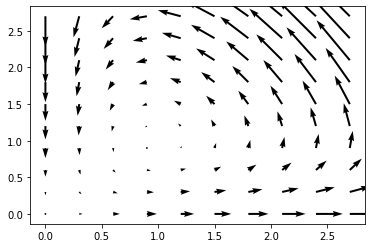

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
x1min    = 0.
x1max    = 3.
dx1      = 0.3
x1       = np.arange(x1min,x1max,dx1)
x2min    = 0.
x2max    = 3.
dx2      = 0.3
x2=np.arange(x2min,x2max,dx2)
XX1,XX2  = np.meshgrid(x1, x2)
U        = XX1*(1-XX2)
V        = -XX2*(1-XX1)
q=ax.quiver(XX1,XX2,U,V)
plt.show()

## Question 3

Les applications composantes de $f$ étant polynomiales, $f$ est continue et continûment différentiable sur $\mathbb{R}^2$.\
On peut donc appliquer le théorème de Cauchy-Lipschitz :\
Pour tout $t_0,x_0 \in \mathbb{R} \times \mathbb{R}^2$, il existe une unique solution maximale de $E$ telle que $x(t_0) = x_0$

Soit $t_0,x_0 \in \mathbb{R} \times \mathbb{R}_{>0}^2$. On note $x$ la solution donnée par le théorème de Cauchy-Lipschitz, avec ces conditions initiales.\
Montrons que $\forall t \in \mathbb{R}, x(t) \in \mathbb{R}_{>0}^2.$\
Par l'absurde : supposons qu'il existe $a \in \mathbb{R}$ tel que $x_1(a) \leq 0$ ou $x_2(a) \leq 0$\
Par continuité de $x_1$ et $x_2$, il existe $b \in \mathbb{R}$ tel que $x_1(b) = 0$ ou $x_2(b) = 0$\
On remarque que $x$ est aussi l'unique solution maximale de $E$ qui vaut $x(b)$ en $b$

$\bullet$ Cas 1 : $x_1(b) = 0$\
On pose : 
$$\begin{array}{ccccc}
y & : & \mathbb{R} & \to & \mathbb{R}^{2} \\
 & & t & \mapsto & 0,x_2(b)\exp(\gamma(b-t)) \\
\end{array}$$

$y$ est solution globale (donc maximale) de $E$, et vérifie $y(b) = x(b)$.\
D'après le théorème de Cauchy-Lipschitz, $x=y$.\
En particulier, $x(t_0) = x_0 = y(t_0) = (0,x_2(b)\exp(\gamma(b-t_0))$.\
Or $x_0 \in \mathbb{R}_{>0}^2$. Absurde.

$\bullet$ Cas 2 : $x_2(b) = 0$\
On pose :
$$\begin{array}{ccccc}
y & : & \mathbb{R} & \to & \mathbb{R}^{2} \\
 & & t & \mapsto & x_1(b)\exp(\alpha(t-b)),0 \\
\end{array}$$

La suite du raisonnement est identique au cas 1.

On aboutit à une absurdité dans les deux cas. Par conséquent, toute solution initialisée dans $\mathbb{R}_{>0}^2$ reste dans $\mathbb{R}_{>0}^2$ sur son domaine de définition.

## Question 4

Soit $x$ une solution initialisée dans $\mathbb{R}_{>0}^2$.\
$H$ est donc bien définie et dérivable sur $]0;\infty[$\
$\dot{H} = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2}$ or $x$ est solution de $E$ donc $\dot{x_1} = x_1(\alpha - \beta x_2)$ et $\dot{x_2} = -x_2(\gamma - \delta x_1)$\
On obtient $\dot{H} = 0$, $H$ est constante.\
On en déduit, d'après la forme de $H$, que $x$ est bornée.

$x$ est définie sur $]t^-,t^+[$ avec $t^-,t^+ \in \mathbb{R} \cup \{+\infty,-\infty\}$.\
D'après le théorème du domaine maximal d'existence :\
$\bullet$ si $t^-$ est fini alors : $\lim\limits_{t \rightarrow t^-} d\left((t,x(t)),\partial(\mathbb{R}\times\mathbb{R}^2)\right)=0$ ou $\lim\limits_{t \rightarrow t^-} \lVert x(t) \rVert = +\infty$\
$\bullet$ si $t^+$ est fini alors : $\lim\limits_{t \rightarrow t^+} d\left((t,x(t)),\partial(\mathbb{R}\times\mathbb{R}^2)\right)=0$ ou $\lim\limits_{t \rightarrow t^+} \lVert x(t) \rVert = +\infty$\
Or puisque $x$ est bornée, les cas $\lim\limits_{t \rightarrow t^-} \lVert x(t) \rVert = +\infty$ et $\lim\limits_{t \rightarrow t^+} \lVert x(t) \rVert = +\infty$ sont impossibles.\
$\partial(\mathbb{R}\times\mathbb{R}^2) = \emptyset$ donc les deux autres cas sont aussi exclus.\
$t^-$ et $t^+$ ne sont pas finis, $x$ est globale.

## Question 5

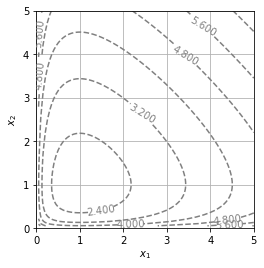

In [14]:
import matplotlib.pyplot as plt
import autograd
import autograd.numpy as np

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

alpha, beta, gamma, delta = 1, 1, 1, 1   
    
def H(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta * x1 - gamma * np.log(x1) + beta * x2 - alpha * np.log(x2)

display_contour(
    H, 
    x=np.linspace(0.0, 5.0, 100), 
    y=np.linspace(0.0, 5.0, 100), 
    levels=5
)


On remarque que les courbes de niveau de $H$ sont fermées.\
Les solutions initialisées dans $\mathbb{R}_{>0}^2$ sont donc périodiques : on le remarque car on peut superposer le champ de vecteurs obtenu à la question 2 et les courbes de niveau de $H$. Une solution $x$ parcourt une courbe de niveau de $H$.

## Question 6

In [2]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    X=[x0]
    n=len(x0)
    T=[t0]
    while T[-1]<=tf:
        A=[]
        for i in range(n):
            A.append(X[-1][i]+dt*f(T[-1],X[-1])[i])
        X.append(A)
        T.append(T[-1]+dt)
    return T,X
        
def f_test(t,x):
    return x

solve_euler_explicit(f_test,[1],0.01,0,1)
err=0
for i in range(100):
    test=abs(np.exp(solve_euler_explicit(f_test,[1],0.01,0,1)[0][i])-solve_euler_explicit(f_test,[1],0.01,0,1)[1][i])
    if test>err:
        err=test

print(err)
    

[0.01320098]


Lorsque $dt$ tend vers $0$, $\max\left\| x^{j}-x(t_j) \right\|$ tend vers $0$ pour $1\le j\le \frac{t_f-t_0}{dt}$. La méthode est donc convergent. Je ne sais pas comment visualiser graphiquement l'ordre de convergence, éventuellement on pourrait tracer le graph de l'erreur et sur le même graph mettre une fonction constante égale à $(\Delta t)^{p}$ pour différents p afin de voir à quel p cela correspond. D'après mes essais et dans mes souvenirs, l'ordre de convergence de euler explicite est 1

## Question 7

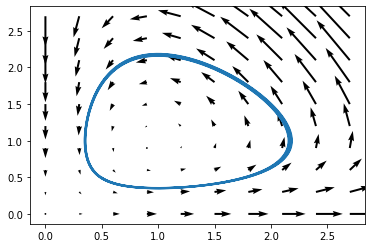

In [3]:
def f(t,x):
    return [x[0]*(1-x[1]),x[1]*(x[0]-1)]

#print(solve_euler_explicit(f,[0.5,0.5],0.1,0,55))
A=solve_euler_explicit(f,[0.5,0.5],0.001,0,55)[1]
B=[]
C=[]
for i in range(len(A)):
    B=B+[A[i][0]]
    C=C+[A[i][1]]

T=solve_euler_explicit(f,[0.5,0.5],0.001,0,55)[0]
fig,ax=plt.subplots()
x1min    = 0.
x1max    = 3
dx1      = 0.3
x1       = np.arange(x1min,x1max,dx1)
x2min    = 0.
x2max    = 3
dx2      = 0.3
x2=np.arange(x2min,x2max,dx2)
XX1,XX2  = np.meshgrid(x1, x2)
U        = XX1*(1-XX2)
V        = -XX2*(1-XX1)
q=ax.quiver(XX1,XX2,U,V)
ax.plot(B,C)
plt.show()

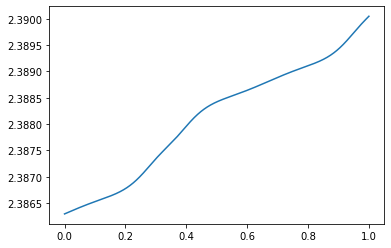

In [13]:
def H(x1,x2):
    return x1-np.log(x1)+x2-np.log(x2)

Y=[]
for i in range(len(A)):
    Y=Y+[H(B[i],C[i])]

plt.plot(T,Y)
plt.show()

Après un temps long on observe que $x$ tend vers $(0,0)$. Cependant cette représentation ne sembla pas fidèle à la réalité. De plus le graph de $H$ montre une fonction qui fluctue, alors que $H$ est constante. Ceci montre bien que la méthode ne donne pas un résultat fidèle à la réalité

## Question 8

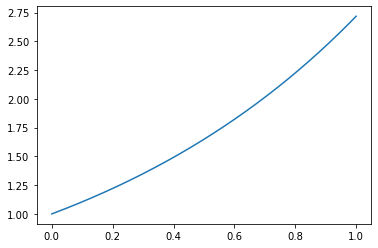

In [10]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    eps=0.001
    #eps est le seuil de l'évolution relative ici choisie arbitrairement
    X=[x0]
    n=len(x0)
    T=[t0]
    while T[-1]<=tf:
        it=0
        Xtemp=[]
        A=[]
        #On itère une première fois l'algorithme pour trouver le point fixe grâce à la méthode Euler explicite 
        for i in range(n):
            Xtemp.append(X[-1][i]+dt*f(T[-1],X[-1])[i])
            A.append(Xtemp[i]-X[-1][i])
            #A sert à avoir un vecteur xj,k+1-xj,k au cours des itérations
        Xj0=Xtemp
        T.append(T[-1]+dt)
        test=np.linalg.norm(A)/np.linalg.norm(Xj0)
        #test sert à calculer l'évolution relative pour avoir une condition d'arrêt
        while test>eps:
            Xmem=Xtemp.copy()
            #Xtemp représente xj,k+1 et Xmem xj,k
            if it>=itermax:
                raise Exception("Trop d'itérations pour trouver un des xj")
            it=it+1
            for i in range(n):
                Xtemp[i]=Xtemp[i]+dt*f(T[-1],Xmem)[i]
            for i in range(n):
                A[i]=Xtemp[i]-Xmem[i]
            test=np.linalg.norm(A)/np.linalg.norm(Xj0)
        X.append(Xtemp)
    return T,X
    


T,A=solve_euler_implicit(f_test,[1],0.0001,0,1)
plt.plot(T,A)
plt.show()

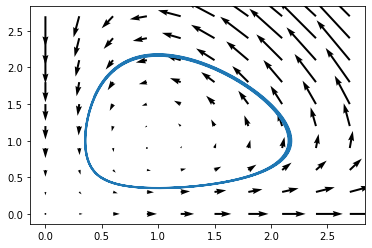

In [11]:
fig,ax=plt.subplots()
x1min    = 0.
x1max    = 3
dx1      = 0.3
x1       = np.arange(x1min,x1max,dx1)
x2min    = 0.
x2max    = 3
dx2      = 0.3
x2=np.arange(x2min,x2max,dx2)
XX1,XX2  = np.meshgrid(x1, x2)
U        = XX1*(1-XX2)
V        = -XX2*(1-XX1)
q=ax.quiver(XX1,XX2,U,V)

D=solve_euler_implicit(f,[0.5,0.5],0.001,0,45,100000)[1]
E=[]
F=[]
for i in range(len(D)):
    E=E+[D[i][0]]
    F=F+[D[i][1]]
ax.plot(E,F)
plt.show()

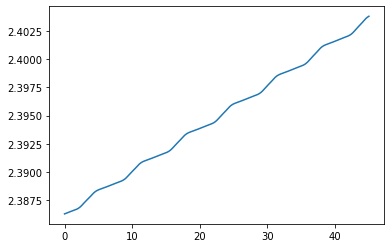

In [14]:
Y=[]
for i in range(len(D)):
    Y=Y+[H(E[i],F[i])]
T=solve_euler_implicit(f,[0.5,0.5],0.001,0,45)[0]
plt.plot(T,Y)
plt.show()

La méthode Euler implicite converge elle aussi pour la solution connue et donne un résultat plus fidèle à la réalité pour les équations de  Lotka-Volterra

## Question 9

$$\begin{array}{ccccc}
f & : & \mathbb{R}^{2} & \to & \mathbb{R}^{2} \\
 & & x_1,x_2 & \mapsto & x_1(\alpha - \beta x_2)-u_1(x1,x2)(H(x1,x2)-H_0),-x_2(\gamma - \delta x_1)-u_2(x1,x2)(H(x1,x2)-H_0) \\
\end{array}$$

Avec u continuement différentiable sur $\mathbb{R}^{2}$. Alors $\partial_xf(t,x)$ existe et est continue sur $\mathbb{R}$ x $\mathbb{R}^{2}$. Alors le Théorème de Cauchy-Lipschitz permet de dire que pour tout $(t_0,x_0)$, il existe une unique solution maximale. Si $H_0$=$H(x(0))$, alors pour un $(t_0,x_0)$ donné la solution de  Lotka-Volterra est solution de la nouvelle équation. Cette solution étant unique, la solution de  Lotka-Volterra est l'unique solution de l'équation. Ceci est vrai pour tout $(t_0,x_0)$

## Question 10

$\frac{d}{dt}\big(H(x(t))-H_0\big) = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2}$

Or $x$ est solution du nouveau système, on a donc :

$\frac{d}{dt}\big(H(x(t))-H_0\big) = -\big(u_1(x_1,x_2)(\delta-\frac{\gamma}{x_1})+u_2(x_1,x_2)(\beta-\frac{\alpha}{x_2})\big)\big(H(x(t))-H_0\big)$

On choisit $u_1(x_1,x_2) = k(\delta-\frac{\gamma}{x_1})$ et $u_2(x_1,x_2) = k(\beta-\frac{\alpha}{x_2})$, ce qui donne :

$\frac{d}{dt}\big(H(x(t))-H_0\big) = -k\big((\delta-\frac{\gamma}{x_1})^2 + (\beta-\frac{\alpha}{x_2})^2\big)\big(H(x(t))-H_0\big) = -k\|\nabla H(x(t))\|^2\big(H(x(t))-H_0\big)$
